<a href="https://colab.research.google.com/github/DannyData1419/CM3704-Business-Ideas-Opportunities/blob/main/CM3704_Offshore_Personnel_Demand_App_Demo_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Offshore Personnel Demand app Demo

**Introduction**

This notebook has been created for CM3704 Business Ideas + Opportunities by DCarlier, 2011881. It represents the ideas behind each of the four components that make up the application to predict offshore personnel demand from the bid stage. Data used in this demo is anonymous and whilst it represents company data, in that it has the same nominal categorical values you will expect, it is completely made up otherwise.

1.   **Creation of features or 'X variables' and Natural Language Processing**
2.   **Data Validation and Warehousing**
3.   **Supervised Machine Learning**
4.   **Data Visualization for Stakeholders**








# Creation of 'features or X variables' and Natural Language Processing

For this experiment we are unable to implement this component, the creation of features or 'X variables' and Natural Language Processing refers to additional variables that we will be able to add once attachments have been analysed. Worth noting is that there will be many more `features or 'X' variables` which will increase the predictive power of the application.

In [1]:
# First import libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from typing import Optional

# Import data from Github
df = pd.read_csv('https://raw.githubusercontent.com/DannyData1419/Dataset-stash/main/example_bid_and_project_data.csv')


## Data Validation and Warehousing

We are now in the **Data Warehouse** or at least that is the space this notebook represents, we have incrementally loaded data from the bids and projects databases into one place to create our **training dataset**. In other words, we have **(Data) Validated** 1728 rows of bids that the company has won, matching each won bid to the subsequent project and have a record of whether offshore personnel were utilized within the project or not. The first six columns represent data referred to as `features or 'X' variables`, nominal categories representing values from the bids database:

* `business_segment` business segment
* `business_group` business group
* `product_type` product type
* `sales_area` sales area
* `total_costs` total costs of the bid before JP
* `safety` safety, i.e., what contractual risks are involved

The last column represent data referred to as the `target or 'y' variable`, labels from our project database:
* `6_Techs_1_Sup` 6 Techs, 1 Superintendent
* `3_Techs_1_ROVPilot_1_Sup` 3 Techs, 1 ROV Pilot, 1 Superintendent
* `4_Techs` 4 Techs
* `Not_Offshore` Not Offshore

Each row, or observation, is used to train the algorithm. It's this label we will predict later on when we expose the algorithm to new unseen bid data. The data we are using is modified from this dataset: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation,

In [2]:
# View sample
df.sample(10)

,business_segment,business_group,product_type,sales_area,total_costs,safety,class
1666,MP,Intervention,Drill_Support,ProjectsBrazil,Small_Costs,Med_Risks,4_Techs
286,OPG,Controls,Observation,ProjectsNorway,Big_Costs,Med_Risks,4_Techs
536,SSR,Engineered_Solutions,Intervention,ProjectsBrazil,Medium_Costs,High_Risks,Not_Offshore
950,IMDS,Engineered_Solutions,Intervention,ProjectsUK,Medium_Costs,High_Risks,Not_Offshore
1108,IMDS,Controls,Drill_Support,ProjectsUK,Small_Costs,Med_Risks,Not_Offshore
1460,MP,ROV,Observation,ProjectsUK,Small_Costs,High_Risks,Not_Offshore
1479,MP,ROV,Observation,ProjectsBrazil,Medium_Costs,Low_Risks,Not_Offshore
1589,MP,Controls,Observation,ProjectsBrazil,Medium_Costs,High_Risks,3_Techs_1_ROVPilot_1_Sup
656,SSR,Controls,RWOCS,ProjectsUK,Big_Costs,High_Risks,Not_Offshore
1550,MP,Controls,Drill_Support,ProjectsNorway,Small_Costs,High_Risks,6_Techs_1_Sup


### Expoloratory Data Analysis

In [3]:
# See the shape of data
df.shape

(1728, 7)

In [4]:
# Provide distribution of numerical data, apply basic statistical computations, missing or NaN values automatically skipped
df.describe()

,business_segment,business_group,product_type,sales_area,total_costs,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,OPG,Engineered_Solutions,RWOCS,ProjectsUK,Small_Costs,Low_Risks,Not_Offshore
freq,432,432,432,576,576,576,1210


In [5]:
# View columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   business_segment  1728 non-null   object
 1   business_group    1728 non-null   object
 2   product_type      1728 non-null   object
 3   sales_area        1728 non-null   object
 4   total_costs       1728 non-null   object
 5   safety            1728 non-null   object
 6   class             1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
# Check missing values
df.isnull().sum()

business_segment    0
business_group      0
product_type        0
sales_area          0
total_costs         0
safety              0
class               0
dtype: int64

### Preprocess data
* Encode features
* Create target labels

In [7]:
# Replace labels with numbers
df['business_segment'] = df['business_segment'].replace({'IMDS':1, 'MP':2, 'OPG':3, 'SSR':4})

# Replace labels with numbers
df['business_group'] = df['business_group'].replace({'Controls':1, 'Engineered_Solutions':2, 'Intervention':3, 'ROV':4})

# Replace labels with numbers
df['product_type'] = df['product_type'].replace({'Drill_Support':1, 'Intervention':2, 'Observation':3, 'RWOCS':4})

# Replace labels with numbers
df['sales_area'] = df['sales_area'].replace({'ProjectsBrazil':1, 'ProjectsNorway':2, 'ProjectsUK':3})

# Replace labels with numbers
df['total_costs'] = df['total_costs'].replace({'Big_Costs':1, 'Medium_Costs':2, 'Small_Costs':3})

# Replace labels with numbers
df['safety'] = df['safety'].replace({'High_Risks':1, 'Low_Risks':2, 'Med_Risks':3})

# Replace labels with numbers
df['class_nums'] = df['class'].replace({'6_Techs_1_Sup':1, '3_Techs_1_ROVPilot_1_Sup':2, '4_Techs':3, 'Not_Offshore':4})

# Convert all variables to factors
df = df.astype('category')

df['class_nums'] = df['class_nums'] .astype('int')

# View preprocessed data
df.sample(10)

,business_segment,business_group,product_type,sales_area,total_costs,safety,class,class_nums
6,3,2,4,3,1,2,Not_Offshore,4
492,4,2,3,3,1,2,Not_Offshore,4
1020,1,4,1,1,2,2,Not_Offshore,4
447,4,2,4,2,1,2,Not_Offshore,4
631,4,4,2,2,3,3,Not_Offshore,4
983,1,4,4,2,3,1,4_Techs,3
997,1,4,4,1,1,3,4_Techs,3
229,3,1,4,2,2,3,Not_Offshore,4
1057,1,4,2,3,2,3,Not_Offshore,4
370,3,3,1,1,3,3,Not_Offshore,4


In [8]:
# Create features
X = df.drop(['class', 'class_nums'], axis=1).values

# Create target
y_num = df['class_nums'].values
y_lab = df['class'].values
y_bin = pd.get_dummies(y_lab)

print(f'y target as text: \n{y_lab} \n\ny target as numeric: \n{y_num}, \n\ny target as binary: \n{y_bin}')

y target as text: 
['Not_Offshore', 'Not_Offshore', 'Not_Offshore', 'Not_Offshore', 'Not_Offshore', ..., '6_Techs_1_Sup', '3_Techs_1_ROVPilot_1_Sup', 'Not_Offshore', '6_Techs_1_Sup', '3_Techs_1_ROVPilot_1_Sup']
Length: 1728
Categories (4, object): ['3_Techs_1_ROVPilot_1_Sup', '4_Techs', '6_Techs_1_Sup', 'Not_Offshore'] 

y target as numeric: 
[4 4 4 ... 4 1 2], 

y target as binary: 
      3_Techs_1_ROVPilot_1_Sup  4_Techs  6_Techs_1_Sup  Not_Offshore
0                            0        0              0             1
1                            0        0              0             1
2                            0        0              0             1
3                            0        0              0             1
4                            0        0              0             1
...                        ...      ...            ...           ...
1723                         0        0              1             0
1724                         1        0              0       

## Supervised Machine Learning

We will split our data into train and test sets, we will use the train set to test hyperparameters for finding the best k. kNN is a similarity based learner and uses a majority voting system which we will use to predict our `class` label. To determine the nearest neighbors, the distance between the data points is calculated using a distance metric. For classification tasks, the class that occurs most frequently among the nearest neighbors is assigned to the data point. We will rate kNNs performance on our test set using metrics; precision, recall, f1 score, and accuracy.

kNN has been chosen for is explainability and interpretability.

In [9]:
# Data for k-NN
y = y_lab
print(f"Features: {X.shape}\n{X}\n\nTarget: {y.shape}\n{y}")

Features: (1728, 6)
[[3 2 4 3 3 2]
 [3 2 4 3 3 3]
 [3 2 4 3 3 1]
 ...
 [2 3 2 1 1 2]
 [2 3 2 1 1 3]
 [2 3 2 1 1 1]]

Target: (1728,)
['Not_Offshore', 'Not_Offshore', 'Not_Offshore', 'Not_Offshore', 'Not_Offshore', ..., '6_Techs_1_Sup', '3_Techs_1_ROVPilot_1_Sup', 'Not_Offshore', '6_Techs_1_Sup', '3_Techs_1_ROVPilot_1_Sup']
Length: 1728
Categories (4, object): ['3_Techs_1_ROVPilot_1_Sup', '4_Techs', '6_Techs_1_Sup', 'Not_Offshore']


In [10]:
# Create 30/70 train test split. 80/20 does not perform as well
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8, stratify=y)

y_test_knn = y_test # Save copy for evaluation

# k=3 k=5, k=7, k=9 - distance used by default=5
knn3 = KNeighborsClassifier(n_neighbors=3)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn7 = KNeighborsClassifier(n_neighbors=7)
knn9 = KNeighborsClassifier(n_neighbors=9)

# Fit classifier to training data
knn3.fit(X_train, y_train)
knn5.fit(X_train, y_train)
knn7.fit(X_train, y_train)
knn9.fit(X_train, y_train)

# Print accuracy
print(f'k=3: {knn3.score(X_test, y_test)}')
print(f'k=5: {knn5.score(X_test, y_test)}')
print(f'k=7: {knn7.score(X_test, y_test)}')
print(f'k=9: {knn9.score(X_test, y_test)}')


k=3: 0.8728323699421965
k=5: 0.905587668593449
k=7: 0.8882466281310212
k=9: 0.8651252408477842


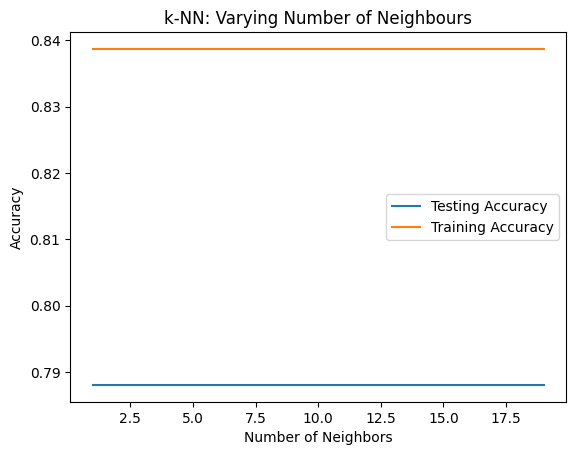

In [11]:
# Overfitting and underfitting: Model complexity curve to compute and plot the train test data

# Setup arrays to store train test accuracies
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over 20 values of k
for i, k in enumerate(neighbors):

    # Setup a k-NN Classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=len(neighbors))

    # Fit classifier to train data
    knn.fit(X_train, y_train)

    # Compute accuracy on train set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Compute accuracy on test set
    test_accuracy[i] = knn.score(X_test, y_test)

# Create plot
plt.title('k-NN: Varying Number of Neighbours')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# By observing how accuracy scores differ for train and test sets with different values of k,
# you will develop an intuition for overfitting and underfitting

In [12]:
# Set error rate for K=1-20
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) # k=11

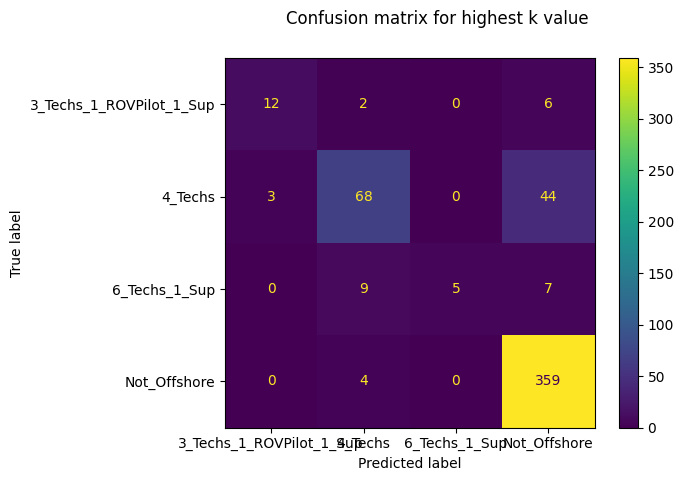

In [13]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

#print(f'Confusion matrix for highest k value: \n{confusion_matrix(y_test, pred)}')
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred)
disp.figure_.suptitle("Confusion matrix for highest k value")

plt.show()
# Confusion Matrix:
# Confusion matrix table summarizes the performance of a classifier. It gives a more detailed picture
# of the classifier performance by breaking down the correct and incorrect predictions for each class

### KNN Performance

In [14]:
# Precision measures the accuracy of positive predictions. It is the number of true
# positive predictions divided by the sum of true positive and false positive predictions

# Recall measures the proportion of positive cases that were correctly identified by the classifier. It is calculated as
# the number of true positive predictions divided by the sum of true positive predictions and false negative predictions

# F1 Score weighted average of precision and recall, where the weighting depends on the balance
# between precision and recall. It is a single number that summarizes the performance of the classifier

# Accuracy, this is the most commonly used metric, which measures the proportion of correct predictions out of all
# predictions made. It can be calculated as the number of correct predictions divided by the total number of predictions

print(55 * "_")
print(f'\nk-NN classification report performance:\n\n{classification_report(y_test_knn,pred)}')
print(55 * "_")

_______________________________________________________

k-NN classification report performance:

                          precision    recall  f1-score   support

3_Techs_1_ROVPilot_1_Sup       0.80      0.60      0.69        20
                 4_Techs       0.82      0.59      0.69       115
           6_Techs_1_Sup       1.00      0.24      0.38        21
            Not_Offshore       0.86      0.99      0.92       363

                accuracy                           0.86       519
               macro avg       0.87      0.60      0.67       519
            weighted avg       0.86      0.86      0.84       519

_______________________________________________________


Text(0, 0.5, 'Error Rate')

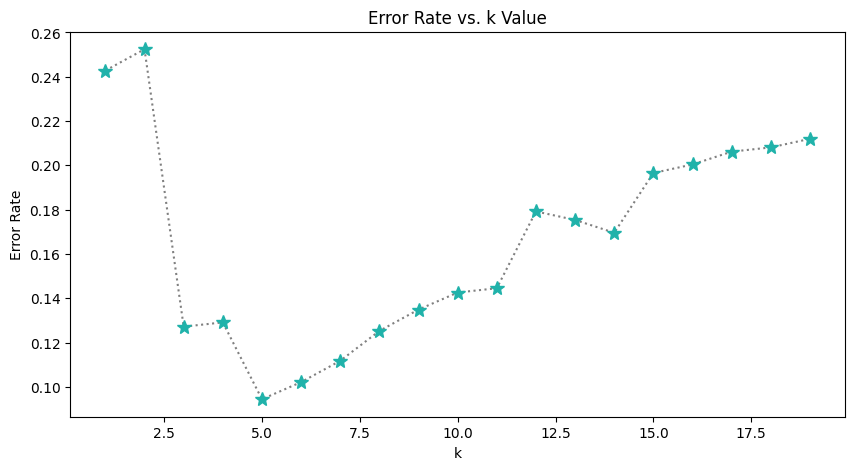

In [15]:
# Small k, the algorithm can be more sensitive to outliers and can produce predictions that are highly influenced
# by just a few data points. In this case, the algorithm is said to have a high degree of complexity and a low bias.

# Big k, the algorithm tends to be more stable and produce predictions that are more representative of the
# majority of the data points. The algorithm is said to have a low degree of complexity and a high bias.

# Create plot
colour = "lightseagreen"

plt.figure(figsize=(10,5))
plt.plot(range(1,20),
         error_rate,
         color='grey',
         linestyle=':',
         marker='*',
         markerfacecolor=colour,
         markeredgecolor=colour,
         markersize=10)
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')

## Data Visualization for Stakeholders

You will have to use your imagination for this last component as this will need to be developed in another software application. The output is the predicted personnel count and job title based on new bid data. Moving forward we will encompass a start date and a histogram timeline of offshore personnel demand and forecasting.

**Expose new bid data to trained algorithm**

New bid data is gathered as part of the bid creation process, this section represents a new bid being added to the database. For this part of the experiment, to predict the `target or 'y' variable`, we will randomly select a value for each of the 6 `features or 'X' variables`:

* `business_segment` business segment
* `business_group` business group
* `product_type` product type
* `sales_area` sales area
* `total_costs` total costs of the bid before JP
* `safety` safety, i.e., what contractual risks are involved



In [18]:
import random

# Generate a random number
bus_seg_num = random.randint(1, 4)

# Create dictionary of numbers and labels
bus_seg_list = {1: 'IMDS', 2: 'MP', 3: 'OPG', 4: 'SSR'}

# Assign number to dict item
bus_seg_lab = bus_seg_list[bus_seg_num]

bus_grp_num = random.randint(1, 4)
bus_grp_list = {1: 'Controls', 2: 'Engineered_Solutions', 3: 'Intervention', 4: 'ROV'}
bus_grp_lab = bus_grp_list[bus_grp_num]

prd_typ_num = random.randint(1, 4)
prd_typ_list = {1: 'Drill_Support', 2: 'Intervention', 3: 'Observation', 4: 'RWOCS'}
prd_typ_lab = prd_typ_list[prd_typ_num]

sale_area_num = random.randint(1, 3)
sale_area_list = {1: 'ProjectsBrazil', 2: 'ProjectsNorway', 3: 'ProjectsUK'}
sale_area_lab = sale_area_list[sale_area_num]

tot_cost_num = random.randint(1, 3)
tot_cost_list = {1: 'Big_Costs', 2: 'Medium_Costs', 3: 'Small_Costs'}
tot_cost_lab = tot_cost_list[tot_cost_num]

safety_num = random.randint(1, 3)
safety_list = {1: 'High_Risks', 2: 'Low_Risks', 3: 'Med_Risks'}
safety_lab = safety_list[safety_num]

# Bid contract values list
print(f'\n\nNew randomly generated bid data, \nwhereby the Business Segment is {bus_seg_lab}, \nfor the Business Group {bus_grp_lab}, \nthe Product Type is {prd_typ_lab},')
print(f'for the {sale_area_lab} Sales Area, \nwith Total Costs before JP recorded as {tot_cost_lab}, \nand with a contractual Safety Rating of {safety_lab},')

# Make prediction on new unseen data
prediction = knn.predict([[bus_seg_num, bus_grp_num, prd_typ_num, sale_area_num, tot_cost_num, safety_num]])

print(f'it is predicted that this contract requires {prediction}\n\n')




New randomly generated bid data, 
whereby the Business Segment is MP, 
for the Business Group Controls, 
the Product Type is Observation,
for the ProjectsBrazil Sales Area, 
with Total Costs before JP recorded as Medium_Costs, 
and with a contractual Safety Rating of High_Risks,
it is predicted that this contract requires ['3_Techs_1_ROVPilot_1_Sup']


